In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.size

8000

In [ ]:
df.dtypes

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [ ]:
df.describe() ###mean and standard deviation

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
x=df.drop(columns="House_Price") ####house price ozhich balance x aanenn kaaanikkaan
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [ ]:
y=df.House_Price
y

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) ##30% test cheyyaan random=shuffling

In [ ]:
from sklearn.preprocessing import StandardScaler  ##mean=0 sd=1
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
multi_lr = LinearRegression()
multi_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=multi_lr.predict(x_test) ##used to predict using multi linear

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
y_pred = multi_lr.predict(x_test)

print('MSE :',mean_squared_error(y_test,y_pred)) ##average of squared diff actual and predict value
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred))) ## square root of mse
print('MAE :',mean_absolute_error(y_test,y_pred))  ##average of absolute difference between actual and predicted values
print('R2 score :',r2_score(y_test,y_pred)) ##how well model fits data

MSE : 6.769392049254198e+17
RMSE : 822763152.3867728
MAE : 761056676.4995847
R2 score : -10666355.185536891


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**DECISION** **TREE** **REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor ##divide into small grps until it reaches the accurate prediction
dtr =DecisionTreeRegressor(criterion='squared_error', min_samples_split=4,max_depth=1000)   ##minimize the mean squared error.
dtr.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=1000, min_samples_split=4)

In [ ]:
y_pred=dtr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

MSE : 285480457695.94867
RMSE : 534303.7129722651
MAE : 471045.1219009833
R2 score : -3.498241826798264


In [ ]:
dtr_r2=r2_score(y_test,y_pred)
dtr_r2

-3.498241826798264

**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(n_estimators=100)
rfr.fit(x_train , y_train)
y_pred=rfr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

MSE : 282331637784.88385
RMSE : 531348.8851826866
MAE : 467891.9722340332
R2 score : -3.448626684860624


In [ ]:
rfr_r2=r2_score(y_test,y_pred)

**SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear') ##kernel to handle non linear relationship
svr.fit(x_train , y_train)
y_pred=svr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

MSE : 3102113238677.455
RMSE : 1761281.7033846276
MAE : 1690319.6290067565
R2 score : -47.879196966068136


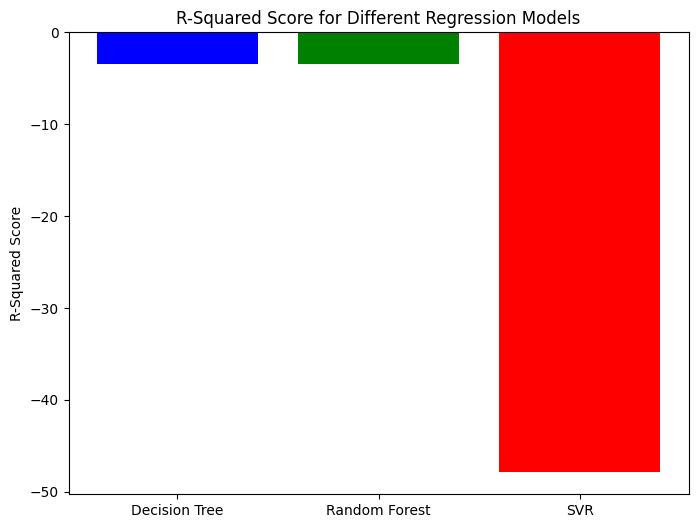

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree' , 'Random Forest' , 'SVR']
r2_scores = [dtr_r2 , rfr_r2,svr_r2]

plt.figure(figsize=(8,6))
plt.bar(models,r2_scores, color = ['blue','green','red'])
plt.ylabel("R-Squared Score")
plt.title("R-Squared Score for Different Regression Models")
plt.show()

In [ ]:
import joblib

joblib.dump(sc,'scaler.pkl')

joblib.dump(svr , 'support_vector_model.pkl')

['support_vector_model.pkl']